In [ ]:
#DELIVERY TIME #SORTING TIME

In [68]:
!pip install pandas_profiling
!pip install sweetviz

In [69]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv


In [70]:
data=pd.read_csv("C:\\Users\\kanis\\Documents\\Assignment\\Assignments data\\Simple linear regression\\delivery_time.csv")

In [71]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [72]:
data.duplicated().sum()

0

<AxesSubplot:>

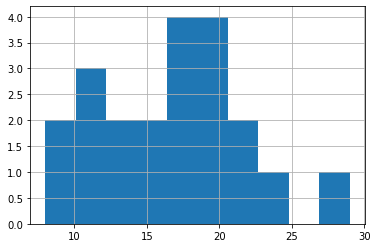

In [73]:
data["Delivery Time"].hist()

<AxesSubplot:>

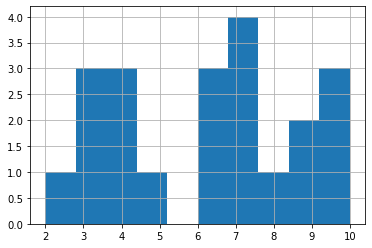

In [74]:
data["Sorting Time"].hist()

<AxesSubplot:>

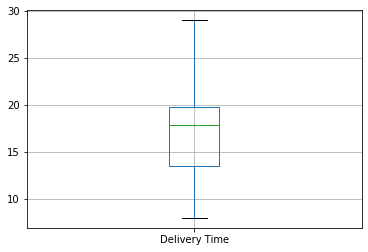

In [75]:
data.boxplot(column=['Delivery Time'])

<AxesSubplot:>

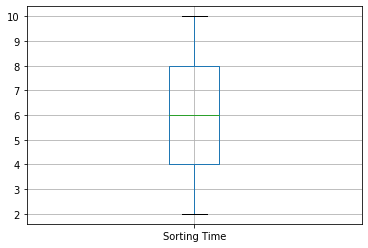

In [76]:
data.boxplot(['Sorting Time'])

In [77]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<AxesSubplot:>

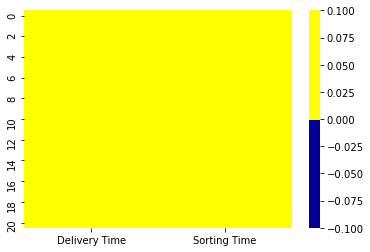

In [79]:
import seaborn as sns
colm=data.columns
colours = ['#000099', '#ffff00']
sns.heatmap(data[colm].isnull(),cmap=sns.color_palette(colours))

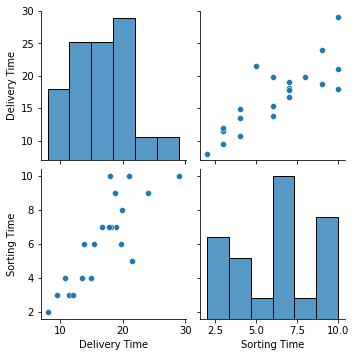

In [80]:
sns.pairplot(data)

In [81]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\kanis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

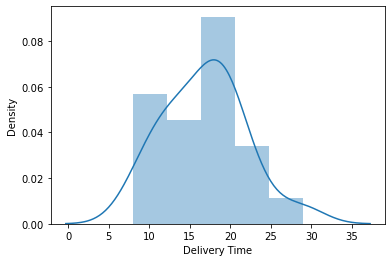

In [82]:
sns.distplot(data['Delivery Time'])

C:\Users\kanis\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

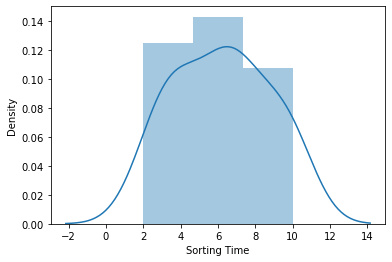

In [83]:
sns.distplot(data['Sorting Time'])
data.skew()

In [84]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [85]:
data["Delivery Time"]

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [86]:
import statsmodels.formula.api as smf

In [87]:
model=smf.ols("data.iloc[:,0] ~ data.iloc[:,1]", data=data).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

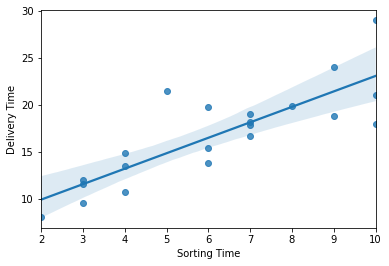

In [88]:
sns.regplot(x='Sorting Time', y='Delivery Time',data=data)

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        data.iloc[:, 0]   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        14:37:31   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.5827      1.722      3.823      0.001       2.979      10.186
data.iloc[:, 1]     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

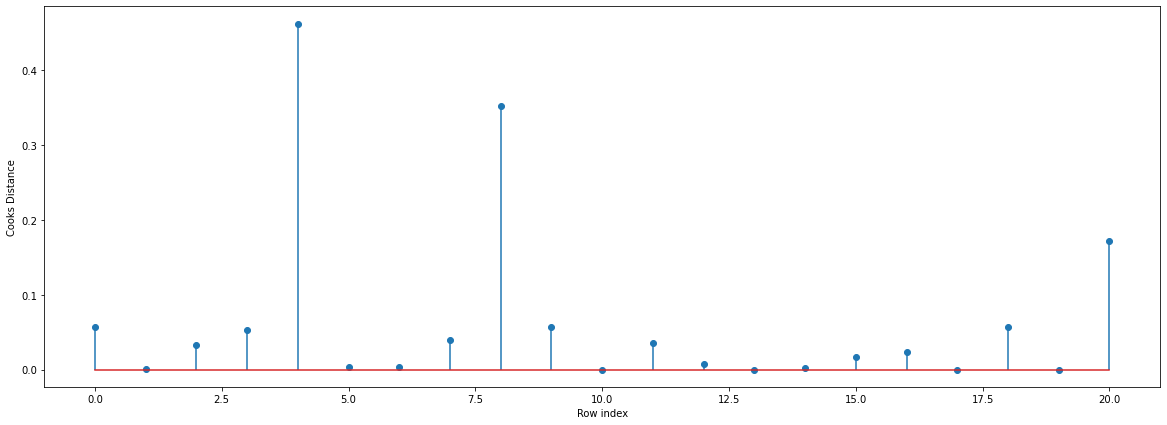

In [103]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [104]:
(np.argmax(c),np.max(c))

(4, 0.4620530412650319)

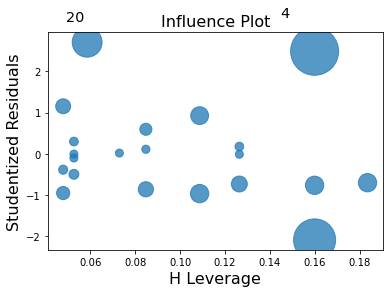

In [105]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [107]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [108]:
data1=data.drop(data.index[[4,8]],axis=0).reset_index()

In [110]:
data1=data1.drop(['index'],axis=1)

In [111]:
model1 = smf.ols("data1.iloc[:,0] ~ data1.iloc[:,1]",data = data1).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

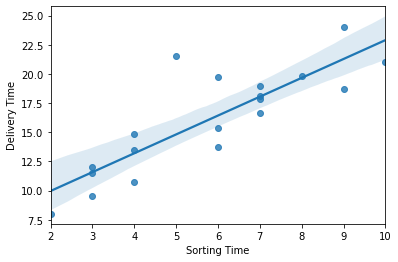

In [113]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=data1)

In [114]:
model1.summary()

C:\Users\kanis\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       data1.iloc[:, 0]   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     42.46
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           5.28e-06
Time:                        14:50:25   Log-Likelihood:                -42.891
No. Observations:                  19   AIC:                             89.78
Df Residuals:                      17   BIC:                             91.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.7323      1.542      4.366      0.000       3.479       9.985
data1.iloc[:, 1]     1.6163      0.248      6.516      0.000       1.093       2.140
==============================================================================
Omnibus:                        8.911   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.059
Skew:                           1.208   Prob(JB):                       0.0483
Kurtosis:                       4.347   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Outcome
Delivery Time = 6.74 + 1.61(Sorting Time)